In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Facial Images\method3.csv")

print(df.describe().T)
print(df.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\OneDrive\\Documents\\Facial Images\\featureVectors_method3.csv'

In [ ]:
df = df.rename(columns={'diagnosis':'label'})
print(df.dtypes)

Unnamed: 0            int64
Mean forehead       float64
Mean left cheek     float64
Mean nose           float64
Mean right cheek    float64
target                int64
Target name          object
dtype: object


In [ ]:
df['Target name'].value_counts()

non-diabetic    16
diabetic         8
Name: Target name, dtype: int64

<AxesSubplot:xlabel='Target name', ylabel='count'>

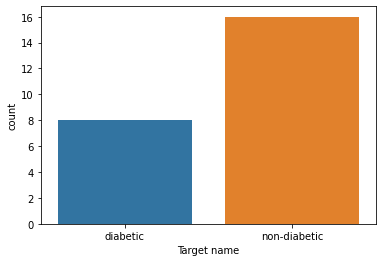

In [ ]:
sns.countplot(x="Target name", data=df)

In [ ]:
y=df["Target name"].values

In [ ]:
x=df.drop(labels=["target","Target name"], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics, svm
from sklearn.model_selection import KFold

skf = KFold(n_splits=10, shuffle = True)

In [ ]:
x_array=x.to_numpy()

In [ ]:
data_splits_object=skf.split(x_array,y)

In [ ]:
my_split_data=next(data_splits_object)
print("Train indices are:", my_split_data[0][0:10])
print("Test indices are:", my_split_data[1][0:10])

Train indices are: [ 0  1  2  3  4  6  7  8  9 10]
Test indices are: [ 5 15 21]


In [ ]:
predicted_y=[]
expected_y=[]

In [ ]:
scaler = MinMaxScaler()


In [ ]:
for train_index, test_index in skf.split(x_array,y):
    x_train, x_test = x_array[train_index], x_array[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    classifier = svm.SVC(kernel='linear', C=1)
    classifier.fit(x_train, y_train)
    
    predicted_this_fold = classifier.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, predicted_this_fold)
    print("Accuracy:" + accuracy.__str__())
    
    predicted_y.extend(predicted_this_fold)
    
    expected_y.extend(y_test)
    
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print('\n',"Accuracy from all folds is: " + accuracy.__str__())

TypeError: fit() missing 1 required positional argument: 'X'